# Алексеева Екатерина Игоревна, БЭК215 (учебная группа - 3), dap_econ_2022_201, ник: eialekseeva_2@edu.hse.ru (id: dap_econ_2022_201).

In [360]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Задача 1. Экзамен

In [361]:
df = pd.read_csv('data/students_exam.csv')

In [362]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college). 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [363]:
a = df[(df['parental level of education'] == "associate's degree") | (df['parental level of education'] == "bachelor's degree")| (df['parental level of education'] == "master's degree")]

In [364]:
b = df[(df['parental level of education'] == "high school") | (df['parental level of education'] == "some high school")| (df['parental level of education'] == "some college")]

In [365]:
sts.ttest_ind(a['math score'], b['math score'], equal_var=True, alternative='greater')

Ttest_indResult(statistic=4.311126649886475, pvalue=8.926343543260116e-06)

P-value меньше уровня значимости, следовательно, нулевая гипотеза отвергается.

In [366]:
sts.ttest_ind(a['math score'], b['math score'], equal_var=False, alternative='greater')

Ttest_indResult(statistic=4.309042859193758, pvalue=9.155018364116071e-06)

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Выбрала t-критерий, так как здесь нет истинных значений о равенстве дисперсий. Поэтому я попробовала два варианта с равными/неравными дисперсиями, но в любом случае нулевая гипотеза отвергается. Видно, что данные распределены ненормально, гистограммы совсем слабо напоминают нормальное распределение. А для t-test необходимо, чтоб выборка имела распределение близкое к нормальному. 

<AxesSubplot:>

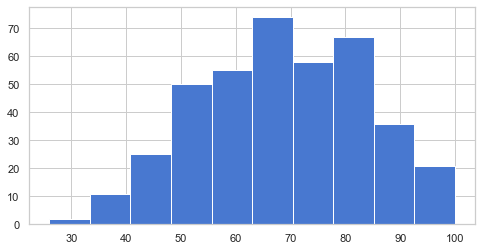

In [367]:
a['math score'].hist()

<AxesSubplot:>

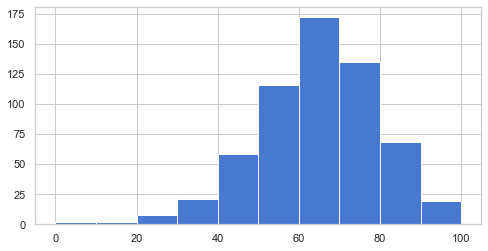

In [368]:
b['math score'].hist()

In [369]:
import statsmodels.api as sm

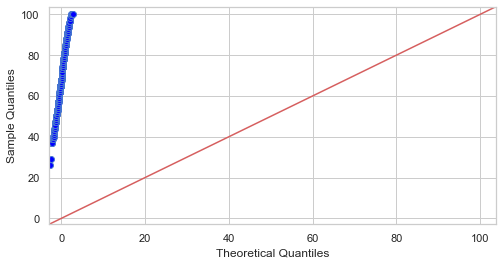

In [370]:
fig = sm. qqplot (a['math score'], line='45')

plt.show()

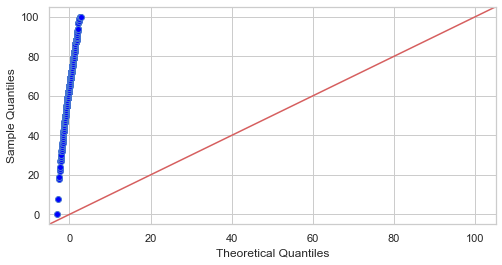

In [371]:
fig = sm. qqplot (b['math score'], line='45')

plt.show()

Данные графики говорят о том, что распределение не совсем похоже на нормальное.

__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [372]:
u = df['math score']- df['reading score']
u

0       0
1     -21
2      -5
3     -10
4      -2
       ..
995   -11
996     7
997   -12
998   -10
999    -9
Length: 1000, dtype: int64

In [373]:
sigm = np.sqrt(1/(len(df['reading score'])-1) * ((u - df['math score'].mean()+df['reading score'].mean())**2).sum())

In [374]:
sigm

9.00481463921866

In [375]:
df['math score'].mean()-df['reading score'].mean() - sts.t.ppf(0.975, 999)*sigm/np.sqrt(999)  #левая граница ДИ

-3.6390705468902205

In [376]:
df['math score'].mean()-df['reading score'].mean() + sts.t.ppf(0.975, 999)*sigm/np.sqrt(999)  #правая граница ДИ

-2.520929453109776

Значение 0 не входит в данный ДИ для разности МО, поэтому нулевая гипотеза отвергается на 5% уровне значимости.

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Выбрала использовать ДИ, так как было интересно посмотреть на границы разности МО, а также чтобы было более удобно использовать формулу для связанных выборок. Кол-во наблюдений большое, да, все предпосылки есть.

# Задача №2:  О мышах и людях

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$, если на бумаге и $2$, если реальную
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [377]:
df = pd.read_csv('data/mouse.csv', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]

__а)__ __[5 баллов]__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

$$
\left[\hat p_A - \hat p_B - z_{crit} \sqrt{\frac{\hat p_A \cdot (1 - \hat p_A)}{n_A} + \frac{\hat p_B \cdot (1 - \hat p_B)}{n_B}} ; \quad  \hat p_A - \hat p_B + z_{crit} \sqrt{\frac{\hat p_A \cdot (1 - \hat p_A)}{n_A} + \frac{\hat p_B \cdot (1 - \hat p_B)}{n_B}} \right]
$$

Посчитаем необходимые компоненты для вычисления ДИ

In [378]:
p_p_hat = len(df[df.STUDY == 1][df.DECISION == 1])/len(df[df.STUDY == 1]) #выборочная доля нажавших на кнопку при решении задани на бумаге

In [379]:
p_p_hat

0.8645833333333334

In [380]:
p_r_hat = len(df[df.STUDY == 2][df.DECISION == 1])/len(df[df.STUDY == 2]) #выборочная доля нажавших на кнопку при решении задани в реальности

In [381]:
p_r_hat

0.7469879518072289

In [382]:
left = p_p_hat - p_r_hat - 1.96*np.sqrt((p_p_hat*(1 - p_p_hat)/len(df[df.STUDY == 1]))+p_r_hat*(1-p_r_hat)/len(df[df.STUDY == 2]))

In [383]:
left  # левая граница ДИ

0.012285580519163022

In [384]:
right = p_p_hat - p_r_hat + 1.96*np.sqrt((p_p_hat*(1 - p_p_hat)/len(df[df.STUDY == 1]))+p_r_hat*(1-p_r_hat)/len(df[df.STUDY == 2]))

In [386]:
right  # правая граница ДИ

0.22290518253304598

Видим, что значение 0 не попадает в 95% ДИ для разницы долей, следовательно, нулевая гипотеза отвергается на уровне значимости 5%.

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ ДИ для разницы долей удобен, так как можно посмотреть, в каких значениях лежит данная величина. Предпосылки выполняются.

__б)__ __[5 баллов]__  Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

In [387]:
df

,STUDY,AGE,GENDER,DECISION,RT
3,1,21,0,1.0,9.212427
4,1,20,0,1.0,17.071711
5,1,21,1,1.0,9.827884
6,1,23,1,1.0,10.143030
7,1,20,1,1.0,7.447534
...,...,...,...,...,...
286,2,20,1,1.0,NaN
287,2,21,1,1.0,NaN
288,2,19,0,0.0,NaN
289,2,21,0,1.0,NaN


In [388]:
df.RT.mean()

10.116762704819278

In [389]:
df.RT.std()

5.080956032263837

In [392]:
sts.t.ppf(0.95, len(df.RT))

1.6504134325561477

In [393]:
left = df.RT.mean()-sts.t.ppf(0.95, len(df.RT))*df.RT.std()/np.sqrt(len(df.RT))

In [394]:
left  # левая граница ДИ

9.61108728984556

In [395]:
right = df.RT.mean()+sts.t.ppf(0.95, len(df.RT))*df.RT.std()/np.sqrt(len(df.RT))

In [396]:
right  # правая граница ДИ

10.622438119792996

Видим, что значние МО 5 не входит в 95% ДИ, поэтому нулевая гипотеза отвергается.

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Тоже ДИ, по тем же соображениям, как и в предыдущих пунктах. Предпосылки выполняются.


# Задача №3:  Парадокс

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |
​
</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |
​
</td><td>
​
|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |
​
</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин? 

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [397]:
share_recovered_med = 770/1650
share_recovered_placebo = 88/223

In [398]:
share_recovered_med, share_recovered_placebo  # доля восстановившихся мужчин, принимавших лекарство, и доля восстановившихся мужчин, принимавших плацебо, соответственно

(0.4666666666666667, 0.39461883408071746)

Разница между ними составляет порядка 7 процентов.

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [399]:
men = np.array([[770,880],[88,135]])

In [400]:
from scipy.stats import chi2_contingency

In [401]:
chi2_contingency(men, correction=False)

(4.107854906463222,
 0.04268446899604581,
 1,
 array([[755.84623599, 894.15376401],
        [102.15376401, 120.84623599]]))

p-value = 4.3%, поэтому гипотеза о том, что лекарство не влияет на мужчин отвергается на уровне 5%. Данный вывод согласуется с долями.

__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [402]:
a = men.sum()
a

1873

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [403]:
n1 = men[0].sum()
n1

1650

In [404]:
n2 = men[1].sum()
n2

223

Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [405]:
p_B = men.sum(axis = 0)[0]/a
p_B

0.4580886278697277

In [406]:
p_B_ = men.sum(axis = 0)[1]/a
p_B_

0.5419113721302723

Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [407]:
y = [[n1*p_B, n1*p_B_], [n2*p_B, n2*p_B_]]

Матрицы идентичны

Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [408]:
stat = ((y - men)**2/men).sum()

In [409]:
stat

4.248199309971195

In [410]:
1 - sts.chi2.cdf(stat, df = 1)  # p-value

0.039291971388500824

Видим, что p-value меньше 5%, поэтому гипотеза о независимости отвергается на уровне значимости 5%.

__в)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [411]:
share_recovered_med = 165/245
share_recovered_placebo = 440/750

women = np.array([[165,80],[440,310]])

chi2_contingency(women, correction=False)

(5.838444095586957,
 0.015679686056826774,
 1,
 array([[148.96984925,  96.03015075],
        [456.03015075, 293.96984925]]))

In [412]:
share_recovered_med, share_recovered_placebo

(0.673469387755102, 0.5866666666666667)

Доли и различаются на почти 10 процентов, но по ним нельзя сделать вывод о том, влияет ли лекарство в действительности на них.

Сделав Хи^2 тест, видно, что p-value попадает в критическую область 5% уровня значимости. Значит, гипотеза о том, что они независимы, отвергается, что также видно из долей.

__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [415]:
share_recovered_med = 935/(935+960)
share_recovered_placebo = 528/(528+445)

l = np.array([[935,960],[528,445]])

chi2_contingency(l, correction=False)

(6.239588767305169,
 0.012492547994073244,
 1,
 array([[966.66143654, 928.33856346],
        [496.33856346, 476.66143654]]))

In [416]:
share_recovered_med, share_recovered_placebo

(0.49340369393139843, 0.5426515930113053)

Видим, что для общей группы лекарство (судя по долям) делает даже хуже. Рассматривая Хи-2 критерий гипотеза о независимости отвергается. __Вот и парадокс__.

# Часть 2: А/Б-тестирование

## Задача №4: Не подглядывать!

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

Учитывая комменарий про одинаковую дисперсию, предположу, что для обеих величин, она равна 1600.

In [417]:
n = ((40**2 + 40**2)*(sts.norm(0, 1).ppf(1-0.05/2) + sts.norm(0, 1).ppf(1-0.2))**2)/(5*5)
days = ((40**2 + 40**2)*(sts.norm(0, 1).ppf(1-0.05/2) + sts.norm(0, 1).ppf(1-0.2))**2)*2/(5*5*200)
n, days

(1004.6566059966833, 10.046566059966834)

Получили, что для одной группы должно быть 1000 пользователей, теперь умножим это на 2 (так как группы 2) и разделим на 200, чтоб получить кол-во дней А\Б-теста (так как трафик в день = 200 пользователей).

Округлим количество дней в большую сторону, получим, __11__ дней для А\Б-теста.

__б) [25 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [418]:
np.random.seed(42)
a = np.random.normal(100, 40, 200)
b = np.random.normal(105, 40, 200)


2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

H0: МО_А = МО_В

H1: МО_А != МО_В
    

In [419]:
df = pd.DataFrame()

In [420]:
df['mean_A'] = np.zeros(50)
df['mean_B'] = np.zeros(50)
df['p-value'] = np.zeros(50)

In [421]:
A = np.array([])
B = np.array([])
for i in range(50):
    #print(a)
    #print(b)
    a = np.random.normal(100, 40, 200)
    b = np.random.normal(105, 40, 200)
    A = np.append(A, a)
    B = np.append(B, b)
    #print(A)
    df['mean_A'][i] = A.mean()
    df['mean_B'][i] = B.mean()
    df['p-value'][i] = sts.ttest_ind(A, B)[1]
    #print(a.mean(), b.mean(), sts.ttest_ind(a, b)[1])
    


In [422]:
df.index = np.arange(1, 51)

In [423]:
df

,mean_A,mean_B,p-value
1,96.573799,105.358666,2.975401e-02
2,100.851928,107.851993,1.381132e-02
3,100.639612,108.003068,1.545543e-03
4,101.617789,107.439654,3.514957e-03
5,100.767346,106.897501,5.578097e-04
6,101.072751,106.840067,3.465117e-04
7,100.908030,105.780751,1.186720e-03
8,101.265040,105.903427,1.089965e-03
9,100.985334,105.531640,6.691089e-04
10,100.567155,104.974657,5.046793e-04


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

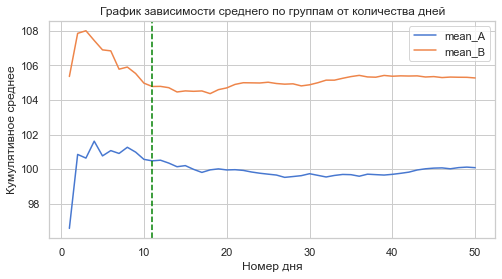

In [425]:
plt.plot(df.index, df.mean_A, label = 'mean_A')
plt.plot(df.index, df.mean_B, label = 'mean_B')
plt.axvline(x=11, color = 'green', linestyle='dashed')
plt.xlabel("Номер дня")
plt.ylabel('Кумулятивное среднее')
plt.title("График зависимости среднего по группам от количества дней")
plt.legend()
plt.show()

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

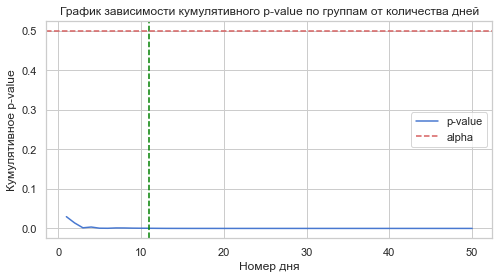

In [427]:
plt.plot(df.index, df['p-value'], label = 'p-value')

plt.axvline(x=11, color = 'green', linestyle='dashed')
plt.axhline(y=0.5, color='r', linestyle='dashed', label = 'alpha')
plt.xlabel("Номер дня")
plt.ylabel('Кумулятивное p-value')
plt.title("График зависимости кумулятивного p-value по группам от количества дней")
plt.legend()
plt.show()

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

* a) До кол-ва дней из п.1 видны колебания p-value, которые совершенно исчезают к 11 дню А\Б-теста.
* б) В точке 11 дня значение p-value стремится к 0.
* с) После точки в 11 дней также видно уменьшение p-value и стремление к 0.

То есть с ростом кол-ва наблюдений p-value снижается и стремится все больше к 0, следовательно, гипотеза, как ни странно, о равенстве МО А и Б отвергается на уровне значимости 5%.

Важно заметить, что если рассматривать первые пару дней теста, то можно сделать вывод о том, что гипотеза не отвергается на уровне значимости 1%, но это не является достоверным результатом А\Б-теста, так как кол-во дней не достаточное.

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [428]:
df_1 = pd.DataFrame()
df_1['mean_A'] = np.zeros(50)
df_1['mean_B'] = np.zeros(50)
df_1['p-value'] = np.zeros(50)

A = np.array([])
B = np.array([])
for i in range(50):
    #print(a)
    #print(b)
    a = np.random.normal(100, 40, 200)
    b = np.random.normal(101, 40, 200)
    A = np.append(A, a)
    B = np.append(B, b)
    #print(A)
    df_1['mean_A'][i] = A.mean()
    df_1['mean_B'][i] = B.mean()
    df_1['p-value'][i] = sts.ttest_ind(A, B)[1]
    #print(a.mean(), b.mean(), sts.ttest_ind(a, b)[1])
    
df_1.index = np.arange(1, 51)
df_1

,mean_A,mean_B,p-value
1,96.536573,99.445772,0.464262
2,98.387261,101.991900,0.202222
3,98.696319,101.484224,0.224127
4,99.572836,102.290764,0.167637
5,98.943658,100.099062,0.512168
6,99.750439,99.560299,0.906732
7,100.027176,99.392768,0.673282
8,100.125149,99.965807,0.909789
9,99.817398,99.988569,0.896401
10,100.171277,99.691568,0.699639


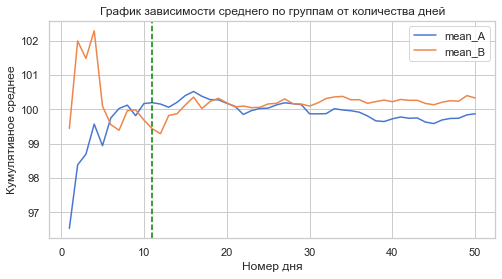

In [429]:
plt.plot(df_1.index, df_1.mean_A, label = 'mean_A')
plt.plot(df_1.index, df_1.mean_B, label = 'mean_B')
plt.axvline(x=11, color = 'green', linestyle='dashed')
plt.xlabel("Номер дня")
plt.ylabel('Кумулятивное среднее')
plt.title("График зависимости среднего по группам от количества дней")
plt.legend()
plt.show()

Здесь видим, что также, как и в предыдущем номере, при увеличении кол-ва наблюдений колебания становятся меньше, а среднее ближе к истинному мат ожиданию.

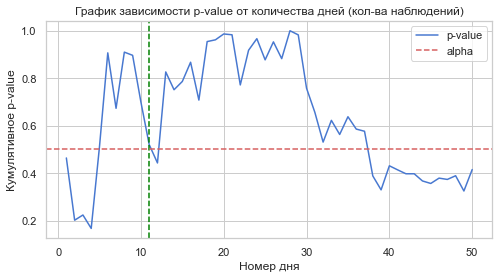

In [430]:
plt.plot(df_1.index, df_1['p-value'], label='p-value')
plt.axvline(x=11, color = 'green', linestyle='dashed')
plt.axhline(y=0.5, color='r', linestyle='dashed', label='alpha')
plt.xlabel("Номер дня")
plt.ylabel('Кумулятивное p-value')
plt.title("График зависимости p-value от количества дней (кол-ва наблюдений)")
plt.legend()
plt.show()

Здесь кумулятивное p-value колеблется значительно дольше, чем ы предыдущем эксперименте, потому что там более выражено различие между МО групп. Здесь же оно составляет 1, поэтому чтобы более достоверно определить, какая гипотеза верна, А\Б-тест придется делать дольше, чем 11 дней. 

__с) [20баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

In [431]:
df_1 = pd.DataFrame()
df_1['mean_A'] = np.zeros(50)
df_1['mean_B'] = np.zeros(50)
df_1['p-value'] = np.zeros(50)

A = np.array([])
B = np.array([])
for i in range(50):
    #print(a)
    #print(b)
    a = np.random.normal(100, 40, 200)
    b = np.random.normal(100, 40, 200)
    A = np.append(A, a)
    B = np.append(B, b)
    #print(A)
    df_1['mean_A'][i] = A.mean()
    df_1['mean_B'][i] = B.mean()
    df_1['p-value'][i] = sts.ttest_ind(A, B)[1]
    #print(a.mean(), b.mean(), sts.ttest_ind(a, b)[1])
    
df_1.index = np.arange(1, 51)
df_1

,mean_A,mean_B,p-value
1,106.723666,99.258164,0.052016
2,104.528130,98.667967,0.034519
3,103.074197,99.787710,0.150111
4,103.579616,99.716655,0.054145
5,102.400881,100.235206,0.228111
6,102.357702,100.306418,0.216552
7,101.790779,100.401334,0.365502
8,101.774990,100.677035,0.443708
9,101.232412,100.594962,0.636377
10,101.486284,100.688098,0.527862


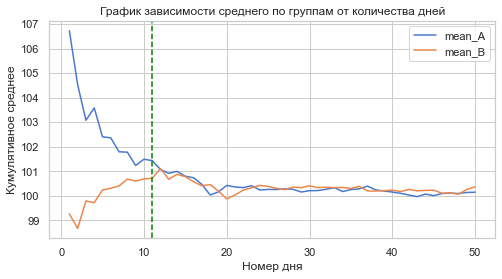

In [432]:
plt.plot(df_1.index, df_1.mean_A, label = 'mean_A')
plt.plot(df_1.index, df_1.mean_B, label = 'mean_B')
plt.axvline(x=11, color = 'green', linestyle='dashed')
plt.xlabel("Номер дня")
plt.ylabel('Кумулятивное среднее')
plt.title("График зависимости среднего по группам от количества дней")
plt.legend()
plt.show()

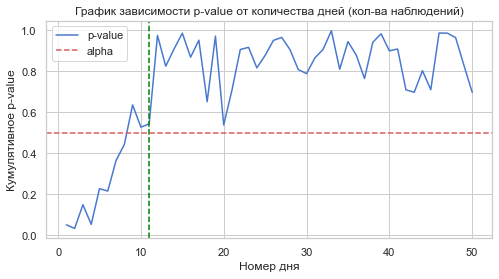

In [433]:
plt.plot(df_1.index, df_1['p-value'], label='p-value')
plt.axvline(x=11, color = 'green', linestyle='dashed')
plt.axhline(y=0.5, color='r', linestyle='dashed', label='alpha')
plt.xlabel("Номер дня")
plt.ylabel('Кумулятивное p-value')
plt.title("График зависимости p-value от количества дней (кол-ва наблюдений)")
plt.legend()
plt.show()

Выборки из одного и того же распределения, но p-value ниже уровня значимости до 9 примерно дня, а следовательно, нулевая гипотеза о равенстве МО на 5% уровне значимости отвергается при данном количестве наблюдений, поэтму данный А\Б-тест необходимо делать дольше. То есть чем больше наблюдений, тем более достоверный результат.

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.